In [6]:
#Libraries

import numpy as np
import matplotlib.pyplot as plt

## Runge-Kutta 4th Order - Definition
### General use

In [2]:
def RungeKutta4(func,h:float = 0.1,t0:float = 0.0,tf:float = 1.0,y0:float = 0,**kwargs):
    
    n = np.uint64((tf-t0)/h)
    
    yvalues = []
    
    for i in range(n+1):
        if i == 0:
            tk = t0
            yk = y0
            
            yvalues.append(y0)
            continue
        else:
            k1 = h*func(tk,yk,**kwargs)
            k2 = h*func(tk+0.5*h,yk+0.5*k1,**kwargs)
            k3 = h*func(tk+0.5*h,yk+0.5*k2,**kwargs)
            k4 = h*func(tk+h,yk+k3,**kwargs)
            yk = yk + (1/6)*(k1+2*k2+2*k3+k4)
            
            yvalues.append(yk)
            tk = tk + h
        
    yvalues = np.array(yvalues)
    tvalues = np.arange(start=t0,stop=tf+h,step=h)
    
    return tvalues, yvalues

## Runge-Kutta 4th Order - Special Definition
### Use with random generated numbers

In [3]:
def RungeKutta4_RandSamp(func,randsamp,h:float = 0.1,t0:float = 0.0,tf:float = 1.0,y0:float = 0,**kwargs):
    
    n = np.uint64((tf-t0)/h)
    
    yvalues = []
    
    for i in range(n+1):
        if i == 0:
            tk = t0
            yk = y0
            
            yvalues.append(y0)
            continue
        else:
            k1 = h*func(tk,yk,randsamp[i-1],**kwargs)
            k2 = h*func(tk+0.5*h,yk+0.5*k1,randsamp[i-1],**kwargs)
            k3 = h*func(tk+0.5*h,yk+0.5*k2,randsamp[i-1],**kwargs)
            k4 = h*func(tk+h,yk+k3,randsamp[i-1],**kwargs)
            yk = yk + (1/6)*(k1+2*k2+2*k3+k4)
            
            yvalues.append(yk)
            tk = tk + h
        
    yvalues = np.array(yvalues)
    tvalues = np.arange(start=t0,stop=tf+h,step=h)
    
    return tvalues, yvalues

## Injected Current - Definition of different types

In [4]:
def func_test(tk,yk):
    value = 0.5*(tk-yk)
    return value

# Injected Current: a*sin(wt)

def func_voltage_n1(tk:float,yk:float,
                    E:float = 1.0,
                    R:float = 1.0,
                    C:float = 1.0,
                    a:float = 1.0,
                    w:float = 1.0):
    
    tau = R*C
    yvalue = (1/tau)*(E + R*a*np.sin(w*tk) - yk)
    return yvalue

# Injected Current: a*step(t-T)

def func_voltage_n2(tk:float,yk:float,
                    E:float = 1.0,
                    R:float = 1.0,
                    C:float = 1.0,
                    a:float = 1.0,
                    T:float = 0.0):
    
    tau = R*C
    
    if tk-T<0.0:
        yvalue = (1/tau)*(E - yk)
    else:
        yvalue = (1/tau)*(E + R*a - yk)
    
    return yvalue

# Injected Current: random(t) - Normal Distribution with adjustable Mean and SD

def func_voltage_n3(tk:float,yk:float,randitem:float,
                    E:float = 1.0,
                    R:float = 1.0,
                    C:float = 1.0):
    
    tau = R*C
    yvalue = (1/tau)*(E + R*randitem - yk)
    return yvalue

# Injected Current: a*pulse(t)

def func_voltage_n4(tk:float,yk:float,
                    E:float = 1.0,
                    R:float = 1.0,
                    C:float = 1.0,
                    a:float = 1.0,
                    T:float = 0.0,
                    d:float = 1.0):
    
    tau = R*C
    
    if tk<T or tk>T+d:
        yvalue = (1/tau)*(E - yk)
    else:
        yvalue = (1/tau)*(E + R*a - yk)
    
    return yvalue

## Demonstrations
### Injected Current: a*sin(wt)

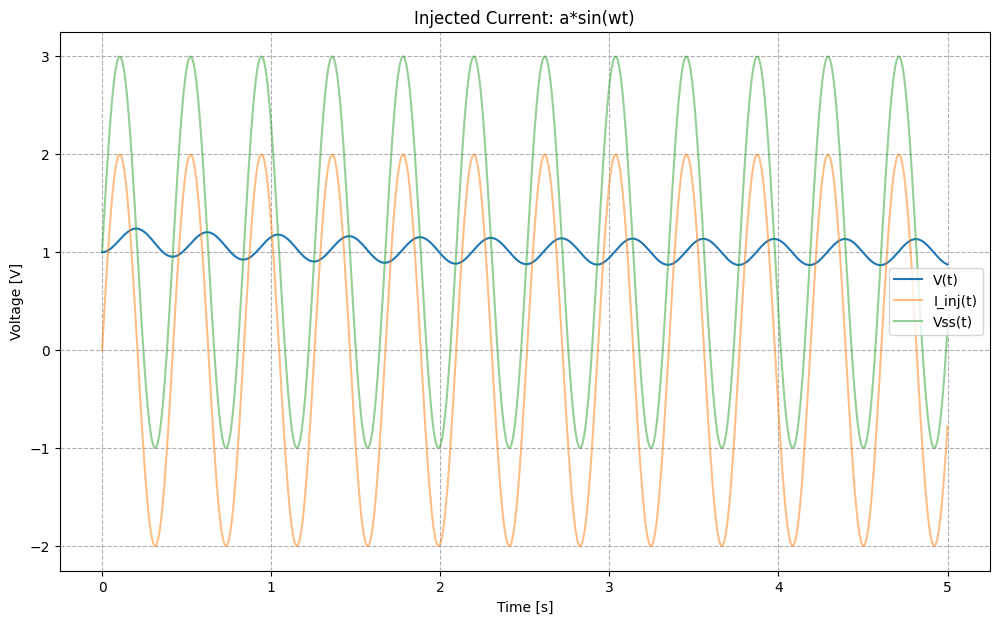

In [5]:
a = 2.0
w = 15.0
R = 1.0
E = 1.0

t1, voltages1 = RungeKutta4(func_voltage_n1,h=0.01,tf=5.0,y0=1.0,a=a,w=w,R=R,E=E)

plt.figure(figsize=(12,7))
plt.plot(t1,voltages1,label='V(t)')
plt.plot(t1,a*np.sin(w*t1),label="I_inj(t)",alpha=0.5)
plt.plot(t1,a*np.sin(w*t1)+E,label="Vss(t)",alpha=0.5)
plt.grid(linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Injected Current: a*sin(wt)")
plt.legend()
plt.show()

### Injected Current: a*step(t-T)

In [6]:
def step(t, a:float = 1.0, T:float = 0.0):
    
    values = a*np.ones(len(t))
    
    values[t-T < 0.0] = 0.0
    
    return values

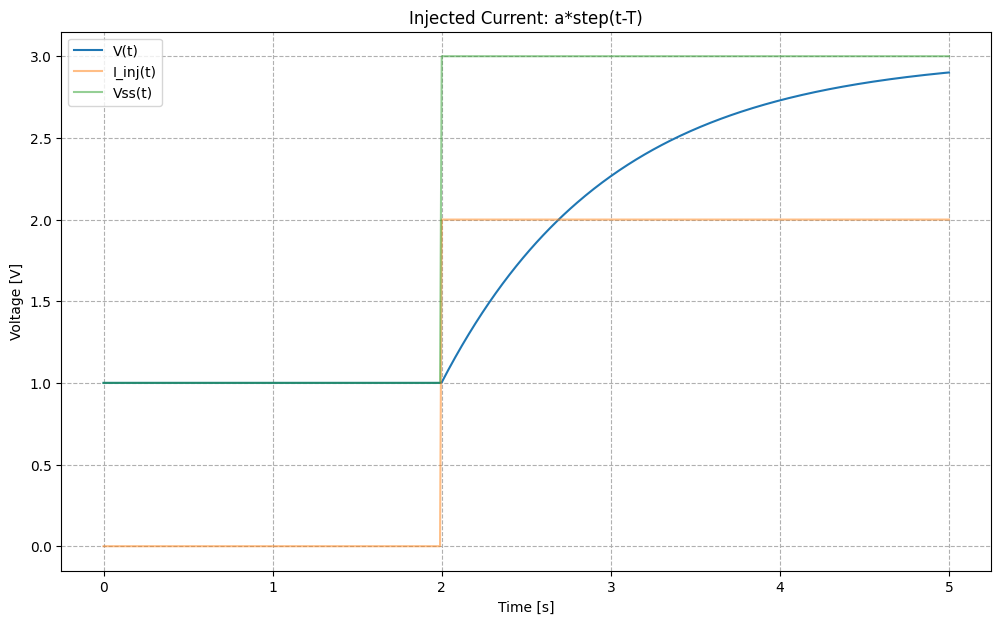

In [7]:
a = 2.0
T = 2.0
R = 1.0
E = 1.0

t2, voltages2 = RungeKutta4(func_voltage_n2,h=0.01,tf=5.0,y0=1.0,a=a,T=T,R=R,E=E)

plt.figure(figsize=(12,7))
plt.plot(t2,voltages2,label='V(t)')
plt.plot(t2,step(t2,a=a,T=T),label="I_inj(t)",alpha=0.5)
plt.plot(t2,R*step(t2,a=a,T=T)+E,label="Vss(t)",alpha=0.5)
plt.grid(linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Injected Current: a*step(t-T)")
plt.legend()
plt.show()

### Injected Current: random(t) - Normal Distribution with adjustable Mean and SD


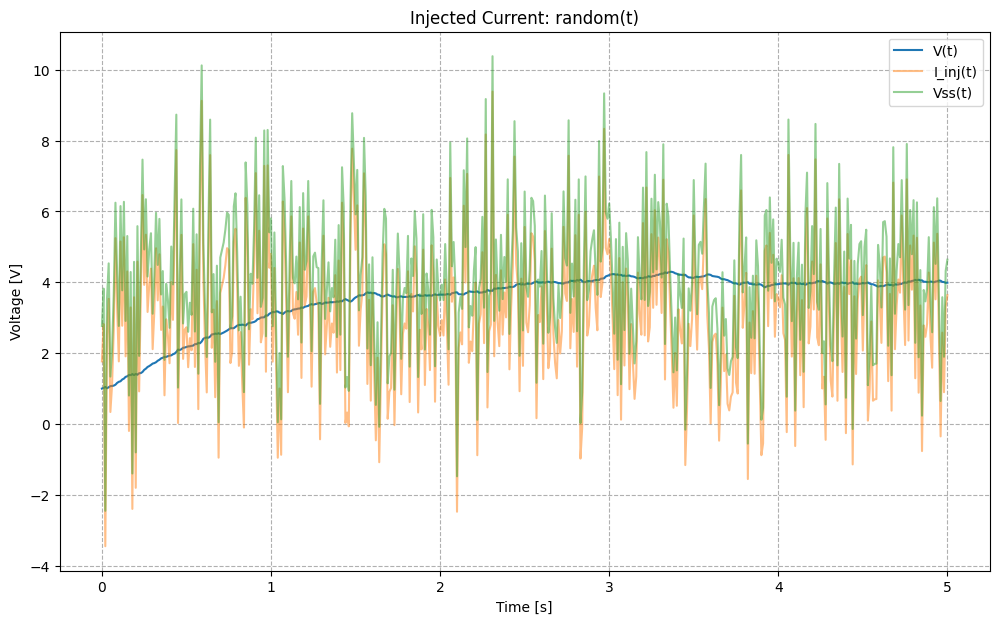

In [8]:
mean = 3.0
sd = 2.0
t0 = 0.0
tf = 5.0
h = 0.01
R = 1.0
E = 1.0

randsample = np.random.normal(loc=mean,scale=sd,size=np.uint32((tf-t0)/h)+1)
t, voltages = RungeKutta4_RandSamp(func_voltage_n3,randsample,h=h,t0=t0,tf=tf,y0=1.0,R=R,E=E)

plt.figure(figsize=(12,7))
plt.plot(t,voltages,label="V(t)")
plt.plot(t,randsample,label="I_inj(t)",alpha=0.5)
plt.plot(t,R*randsample+E,label="Vss(t)",alpha=0.5)
plt.grid(linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title('Injected Current: random(t)')
plt.legend()
plt.show()

### Injected Current: a*pulse(t)

In [9]:
def pulse(t, a:float = 1.0, T:float = 0.0, d:float = 1.0):
    
    values = a*np.ones(len(t))
    
    values[t < T] = 0.0
    values[t > T+d] = 0.0
    
    return values

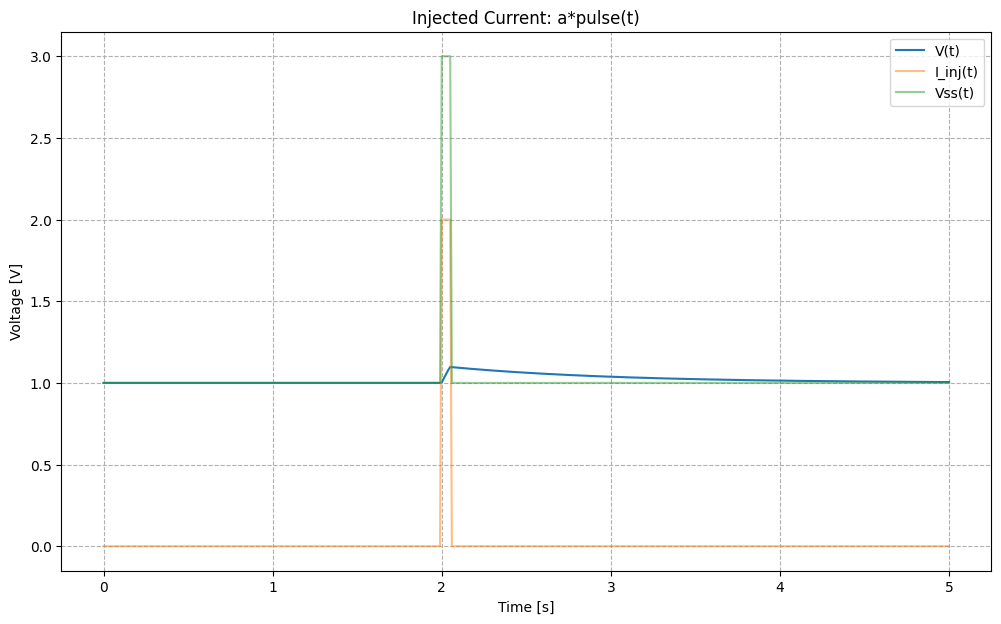

In [10]:
a = 2.0
T = 2.0
d = 0.05
R = 1.0
E = 1.0

t2, voltages2 = RungeKutta4(func_voltage_n4,h=0.01,tf=5.0,y0=1.0,a=a,T=T,d=d,R=R,E=E)

plt.figure(figsize=(12,7))
plt.plot(t2,voltages2,label='V(t)')
plt.plot(t2,pulse(t2,a=a,T=T,d=d),label="I_inj(t)",alpha=0.5)
plt.plot(t2,R*pulse(t2,a=a,T=T,d=d)+E,label="Vss(t)",alpha=0.5)
plt.grid(linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Injected Current: a*pulse(t)")
plt.legend()
plt.show()

In [11]:
def alpha_n(voltage):
    a_n = 0.01*(voltage+10)/(np.exp((voltage+10)/10)-1)
    return a_n

def beta_n(voltage):
    b_n = 0.125*np.exp(voltage/80)
    return b_n

def alpha_m(voltage):
    a_m = 0.1*(voltage+25)/(np.exp((voltage+25)/10)-1)
    return a_m

def beta_m(voltage):
    b_m = 4*np.exp(voltage/18)
    return b_m

def alpha_h(voltage):
    a_h = 0.07*np.exp(voltage/20)
    return a_h

def beta_h(voltage):
    b_h = 1/(np.exp((voltage+30)/10)+1)
    return b_h

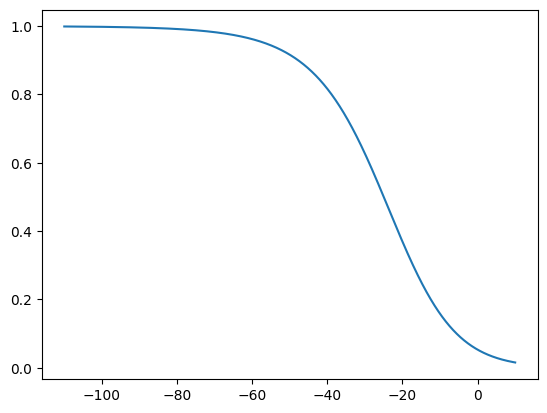

In [12]:
arr_volt = np.linspace(start=-110,stop=10,num=10000)
arr_prueba = np.array([alpha_m(voltage)/(alpha_m(voltage)+beta_m(voltage)) for voltage in arr_volt])

plt.plot(arr_volt,arr_prueba)
plt.show()

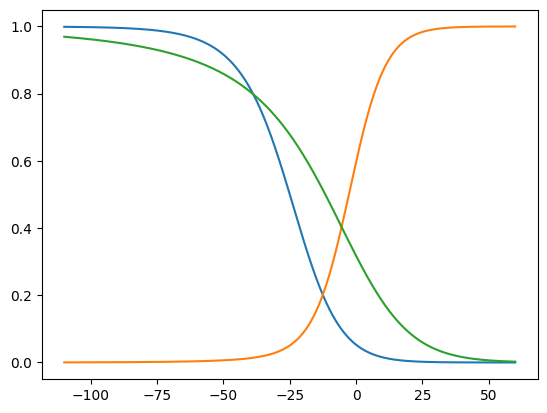

In [23]:
"""def gate_infinite(voltage,gate_type):
    if gate_type == 'n':
        value = alpha_n(voltage)/(alpha_n(voltage)+beta_n(voltage))
        return value
    elif gate_type == 'm':
        value = alpha_m(voltage)/(alpha_m(voltage)+beta_m(voltage))
        return value
    elif gate_type == 'h':
        value = alpha_h(voltage)/(alpha_h(voltage)+beta_h(voltage))
        return value
"""

def gate_infinite(voltage,alpha_type,beta_type):
    value = alpha_type(voltage)/(alpha_type(voltage)+beta_type(voltage))
    return value 

arr_volt = np.linspace(start=-110,stop=60,num=10000)
arr_prueba = np.array([gate_infinite(voltage,alpha_m,beta_m) for voltage in arr_volt])

arr_prueba_2 = np.array([gate_infinite(voltage,alpha_h,beta_h) for voltage in arr_volt])

arr_prueba_3 = np.array([gate_infinite(voltage,alpha_n,beta_n) for voltage in arr_volt])

plt.plot(arr_volt,arr_prueba)
plt.plot(arr_volt,arr_prueba_2)
plt.plot(arr_volt,arr_prueba_3)
plt.show()

In [14]:
"""def tau(voltage,gate_type):
    if gate_type == 'n':
        value = 1/(alpha_n(voltage)+beta_n(voltage))
        return value
    elif gate_type == 'm':
        value = 1/(alpha_m(voltage)+beta_m(voltage))
        return value
    elif gate_type == 'h':
        value = 1/(alpha_h(voltage)+beta_h(voltage))
        return value"""

def tau(voltage,alpha_type,beta_type):
    value = 1/(alpha_type(voltage)+beta_type(voltage))
    return value

In [43]:
def gate(time,voltage,alpha_type,beta_type):
    value = gate_infinite(voltage,alpha_type=alpha_type,beta_type=beta_type) - (gate_infinite(voltage,alpha_type=alpha_type,beta_type=beta_type) - gate_infinite(0,alpha_type=alpha_type,beta_type=beta_type))*np.exp(-time/tau(voltage=voltage,alpha_type=alpha_type,beta_type=beta_type))
    return value

In [44]:
def conductance_Na(time,voltage,g_Na_constant=120):
    value = g_Na_constant*np.power(gate(time,voltage,alpha_m,beta_m),3)*gate(time,voltage,alpha_h,beta_h)
    return value

def conductance_K(time,voltage,g_K_constant=36):
    value = g_K_constant*np.power(gate(time,voltage,alpha_n,beta_n),4)
    return value

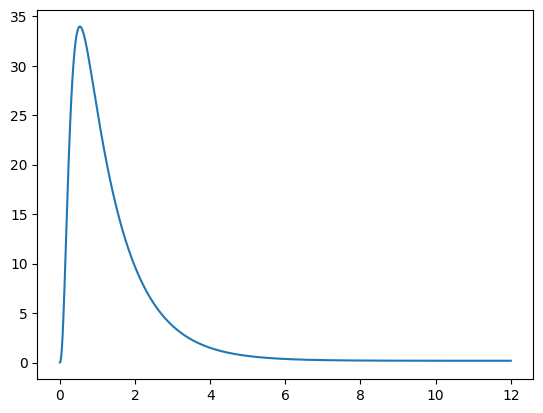

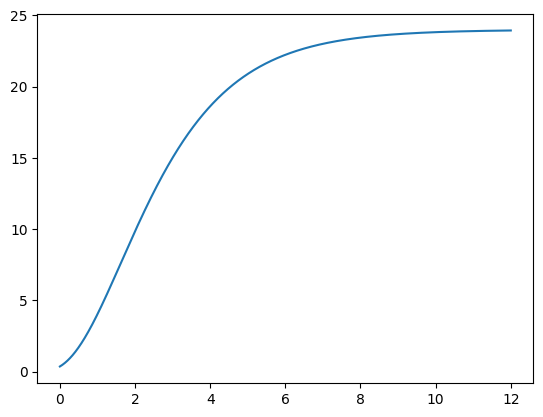

In [45]:
arr_time = np.linspace(start=0,stop=12,num=10000)

arr_Na = np.array([conductance_Na(time=t,voltage=-76) for t in arr_time])

arr_K = np.array([conductance_K(time=t,voltage=-63) for t in arr_time])

plt.plot(arr_time,arr_Na)
plt.show()

plt.plot(arr_time,arr_K)
plt.show()

In [46]:
def right_hand_equation(time,voltage,current_magnitude=1,t_start=0,current_duration=1):
    
    if time < t_start or time > t_start + current_duration:
        yvalue = (1/1.0)*((-1)*conductance_Na(time,voltage)*(voltage+115)+(-1)*conductance_K(time,voltage)*(voltage-12)-0.3*(voltage+10.613))
    else:
        yvalue = (1/1.0)*(current_magnitude+(-1)*conductance_Na(time,voltage)*(voltage+115)+(-1)*conductance_K(time,voltage)*(voltage-12)-0.3*(voltage+10.613))
    
    return yvalue

In [47]:
def current_pulse(time,magnitude=1,t_start=0,duration=1):
    if time < t_start or time > t_start + duration:
        return 0
    else:
        return magnitude

In [48]:
def right_hand_equation_2(time,voltage,current=1):
    
    yvalue = (1/1.0)*(current+(-1)*conductance_Na(time,voltage)*(voltage+115)+(-1)*conductance_K(time,voltage)*(voltage-12)-0.3*(voltage+10.613))
    
    return yvalue

In [87]:
def right_hand_equation_3(time,voltage,current_magnitude=1,t_start_1=0,t_start_2=1,current_duration=1):
    
    if (time > t_start_1 and time < t_start_1 + current_duration) or (time > t_start_2 and time < t_start_2 + current_duration):
        yvalue = (1/1.0)*(current_magnitude+(-1)*conductance_Na(time,voltage)*(voltage+115)+(-1)*conductance_K(time,voltage)*(voltage-12)-0.3*(voltage+10.613))
    else:
        yvalue = (1/1.0)*((-1)*conductance_Na(time,voltage)*(voltage+115)+(-1)*conductance_K(time,voltage)*(voltage-12)-0.3*(voltage+10.613))
    
    return yvalue

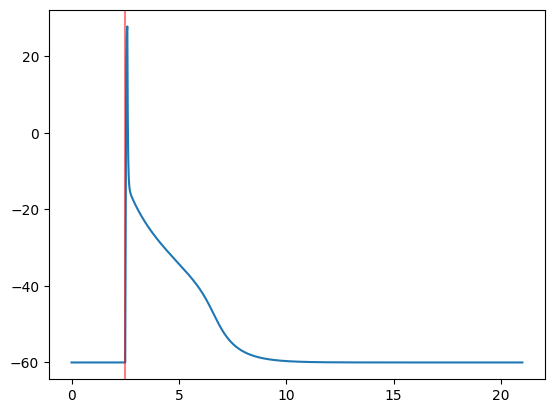

In [93]:
t_start = 2.5
arr_t_test, arr_voltages_test = RungeKutta4(right_hand_equation,h=0.01,tf=21,y0=0,current_magnitude=-2000,t_start=t_start,current_duration=0.1)

plt.plot(arr_t_test,(-1)*arr_voltages_test-60)
plt.axvline(x=t_start, color='red', alpha=0.5)
plt.show()

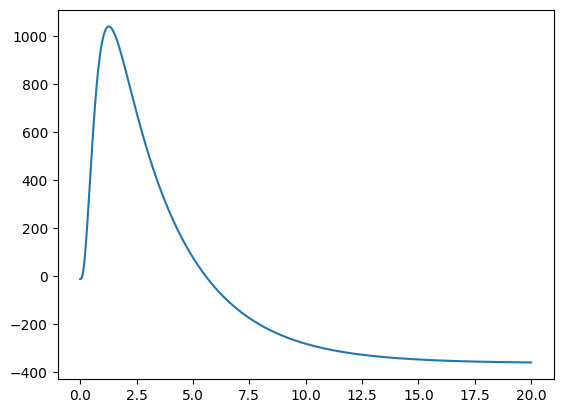

In [34]:
def voltage_clamp(time,voltage):
    yvalue = conductance_Na(time,voltage)*(voltage+115)+conductance_K(time,voltage)*(voltage-12)+0.3*(voltage+-10.613)
    return yvalue

arr_time = np.linspace(start=0,stop=20,num=10000)
arr_i = np.array([voltage_clamp(time,-30) for time in arr_time])

plt.plot(arr_time,arr_i)
plt.show()

In [23]:
class actionPotential:
    
    def __init__(self) -> None:
        self.capacitance_M  = 1
        self.V_Na           = -115
        self.V_K            = 12
        self.V_l            = -10.613
        self.g_Na_constant  = 120
        self.g_K_constant   = 36
        self.g_l_constant   = 0.3
        
    def conductance_Na(self,time,voltage):
        value = self.g_Na_constant*np.power(self.__gate(time=time,voltage=voltage,alpha_type=self.__alpha_m,beta_type=self.__beta_m),3)*self.__gate(time=time,voltage=voltage,alpha_type=self.__alpha_h,beta_type=self.__beta_h)
        return value

    def conductance_K(self,time,voltage):
        value = self.g_K_constant*np.power(self.__gate(time=time,voltage=voltage,alpha_type=self.__alpha_n,beta_type=self.__beta_n),4)
        return value
    
    def membrane_voltage(self,h:float = 0.1,t0:float = 0.0,tf:float = 1.0,y0:float = 0,current_magnitude=1,t_start=0,current_duration=1):
        return self.__RungeKutta4(func=self.__right_hand_equation,h=h,t0=t0,tf=tf,y0=y0,current_magnitude=current_magnitude,t_start=t_start,current_duration=current_duration)
    
    def __RungeKutta4(self,func,h:float = 0.1,t0:float = 0.0,tf:float = 1.0,y0:float = 0,**kwargs):
    
        n = np.uint64((tf-t0)/h)
        
        yvalues = []
        
        for i in range(n+1):
            if i == 0:
                tk = t0
                yk = y0
                
                yvalues.append(y0)
                continue
            else:
                k1 = h*func(tk,yk,**kwargs)
                k2 = h*func(tk+0.5*h,yk+0.5*k1,**kwargs)
                k3 = h*func(tk+0.5*h,yk+0.5*k2,**kwargs)
                k4 = h*func(tk+h,yk+k3,**kwargs)
                yk = yk + (1/6)*(k1+2*k2+2*k3+k4)
                
                yvalues.append(yk)
                tk = tk + h
            
        yvalues = np.array(yvalues)
        tvalues = np.arange(start=t0,stop=tf+h,step=h)
        
        return tvalues, yvalues
        
    
    def __right_hand_equation(self,time,voltage,current_magnitude=0,t_start=0,current_duration=0):
    
        if time < t_start or time > t_start + current_duration:
            yvalue = (1/self.capacitance_M)*((-1)*self.conductance_Na(time=time,voltage=voltage)*(voltage-self.V_Na)+(-1)*self.conductance_K(time=time,voltage=voltage)*(voltage-self.V_K)-self.g_l_constant*(voltage-self.V_l))
        else:
            yvalue = (1/self.capacitance_M)*(current_magnitude+(-1)*self.conductance_Na(time=time,voltage=voltage)*(voltage-self.V_Na)+(-1)*self.conductance_K(time=time,voltage=voltage)*(voltage-self.V_K)-self.g_l_constant*(voltage+self.V_l))
        
        return yvalue
    
    def __gate(self,time,voltage,alpha_type,beta_type):
        value = self.__gate_infinite(voltage=voltage,alpha_type=alpha_type,beta_type=beta_type) - (self.__gate_infinite(voltage=voltage,alpha_type=alpha_type,beta_type=beta_type) - self.__gate_infinite(voltage=0,alpha_type=alpha_type,beta_type=beta_type))*np.exp(-time/self.__tau(voltage=voltage,alpha_type=alpha_type,beta_type=beta_type))
        return value
    
    def __tau(self,voltage,alpha_type,beta_type):
        value = 1/(alpha_type(voltage)+beta_type(voltage))
        return value
    
    def __gate_infinite(self,voltage,alpha_type,beta_type):
        value = alpha_type(voltage)/(alpha_type(voltage)+beta_type(voltage))
        return value 
    
    def __alpha_n(self,voltage):
        a_n = 0.01*(voltage+10)/(np.exp((voltage+10)/10)-1)
        return a_n

    def __beta_n(self,voltage):
        b_n = 0.125*np.exp(voltage/80)
        return b_n

    def __alpha_m(self,voltage):
        a_m = 0.1*(voltage+25)/(np.exp((voltage+25)/10)-1)
        return a_m

    def __beta_m(self,voltage):
        b_m = 4*np.exp(voltage/18)
        return b_m

    def __alpha_h(self,voltage):
        a_h = 0.07*np.exp(voltage/20)
        return a_h

    def __beta_h(self,voltage):
        b_h = 1/(np.exp((voltage+30)/10)+1)
        return b_h

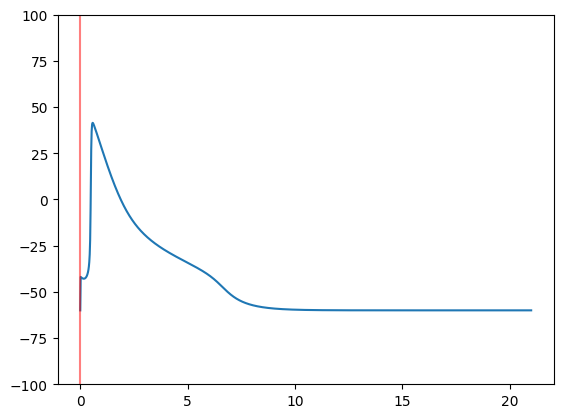

In [38]:
arr_t_test, arr_voltages_test = actionPotential().membrane_voltage(h=0.01,t0=0,tf=21,y0=0,current_magnitude=-1000,t_start=0,current_duration=0.015)

plt.plot(arr_t_test,(-1)*arr_voltages_test-60)
plt.axvline(x=0, color='red', alpha=0.5)
plt.ylim(-100,100)
plt.show()